<a href="https://colab.research.google.com/github/gggaravind/AI-ML/blob/master/Diabetes_India_Female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
"""from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))"""

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [3]:
# Clone the entire repo.
!git clone -l -s git://github.com/gggaravind/AI-ML.git cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
cloned-repo	 LICENSE-CODE  notebooks  requirements.txt  website
environment.yml  LICENSE-TEXT  README.md  tools


In [0]:
raw_data = pd.read_csv('cloned-repo/diabetes.csv')

In [6]:
raw_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
raw_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
import matplotlib.pyplot as plt


In [0]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [0]:
x = raw_data.iloc[0:-10,:].drop('Outcome', axis=1)
y = raw_data['Outcome'].iloc[0:-10]
x_see = raw_data.iloc[-10:-1,:].drop('Outcome', axis=1)
y_see = raw_data['Outcome'].iloc[-10:-1]

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
x_scaled = scaler.fit_transform(x)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [15]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = reg.predict(x_test)

In [17]:
y_pred is y_test

False

In [18]:
ans['y_test'] = y_test
ans['y_pred'] = y_pred

NameError: ignored

In [0]:
ans=pd.DataFrame()

In [19]:
ans

NameError: ignored

In [0]:
reg.score(x_train,y_train)

In [0]:
s = 0

In [21]:
for i in range(y_test.size):
  if ans['y_test'].iloc[i] == ans['y_pred'].iloc[i]:
    s += 1

s/y_test.size

NameError: ignored

In [0]:
x_see_ = scaler.fit_transform(x_see)

In [0]:
test_data = pd.DataFrame()

In [0]:
test_data = x_see.copy()


In [0]:
test_data['Outcome'] = y_see

In [0]:
results = reg.predict(x_see_)

In [27]:
results

array([0, 1, 0, 1, 0, 0, 0, 0, 0])

In [28]:
y_see

758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
Name: Outcome, dtype: int64

In [0]:
import numpy as np

In [30]:
y_res = np.transpose(np.array(y_see))
y_res

array([0, 1, 0, 1, 0, 0, 0, 0, 1])

In [0]:
final = [[results] , [y_res]]

In [32]:
final

[[array([0, 1, 0, 1, 0, 0, 0, 0, 0])], [array([0, 1, 0, 1, 0, 0, 0, 0, 1])]]

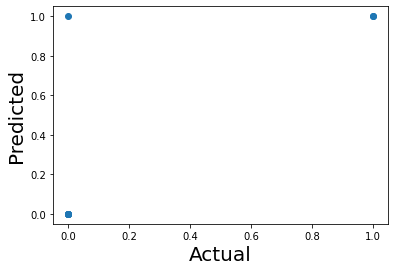

In [35]:
plt.scatter(results, y_res)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)
plt.show()